# 🍷 PROJECT TITLE : WINE QUALITY(RED & WHITE)

# 📘 Introduction


Wine quality data provides a fascinating intersection between chemical measurements and subjective quality ratings. The wine industry is one of the most dynamic and competitive markets worldwide, The combines red and white wine data, capturing various physicochemical properties such as acidity, pH, residual sugar, alcohol content, and more, alongside expert-rated quality scores. By merging these datasets, researchers and analysts can identify broader trends, patterns, and correlations that influence wine quality. This merged approach allows for deeper insights, improved predictive modeling, and a comprehensive understanding of wine characteristics across different wine types.

# 📌 Importance of the Project

* Objective Quality Assessment – Helps replace subjective tasting methods with data-driven models for consistent quality evaluation.


* Business Insights – Assists wineries, distributors, and retailers in identifying factors that impact pricing, production, and customer satisfaction.


* Product Optimization – Enables winemakers to refine production processes by understanding how chemical properties influence taste and quality.


* Predictive Analytics – Supports the development of machine learning models to predict wine quality accurately.


* Consumer Awareness – Provides valuable insights for consumers seeking wines with specific characteristics, enhancing transparency in the market.


* Research Advancement – Contributes to academic studies in data science, chemistry, and food technology by offering a well-structured, real-world dataset.


#  Data Loading 

We will load the wine quality dataset. This dataset contains chemical properties of red and white wines, with quality ratings as integers. The file is a CSV file with the following columns:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality
- type (red or white)

Let's load and inspect the data.

# Import loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
np.random.seed(42)
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('wine_quality_merged.csv')

# 🛠️ Functions 

↪ Preview(Top 5 columns)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


↪ Last Rows(Last 5 columns)

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


↪ statistical Analysis

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


↪ Structure & nulls 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


↪ Dimensions (rows, columns)

In [7]:
df.shape

(6497, 13)

↪ columns of dataset

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

# Data Cleaning and Preprocessing

In this section, we check for missing values, data types, and make sure the dataset is ready for exploration and modeling. Note that sometimes the data might have slight formatting issues that can cause errors later in the analysis. Here, our approach includes checking for anomalies and converting data types if necessary.

↪ To check null values

In [9]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


↪ To clean and drop the duplicates values

In [10]:
df_cleaned = df.drop_duplicates()

# Exploratory Data Analysis

We now dive into some exploratory visualizations to understand the relationships and distributions within the dataset. Our approach includes creating various plots such as histograms, box plots, heatmaps and pair plots. This helps us uncover potential correlations between wine properties and quality.

Below are some visualizations to analysis the data.

# HISTOGRAM

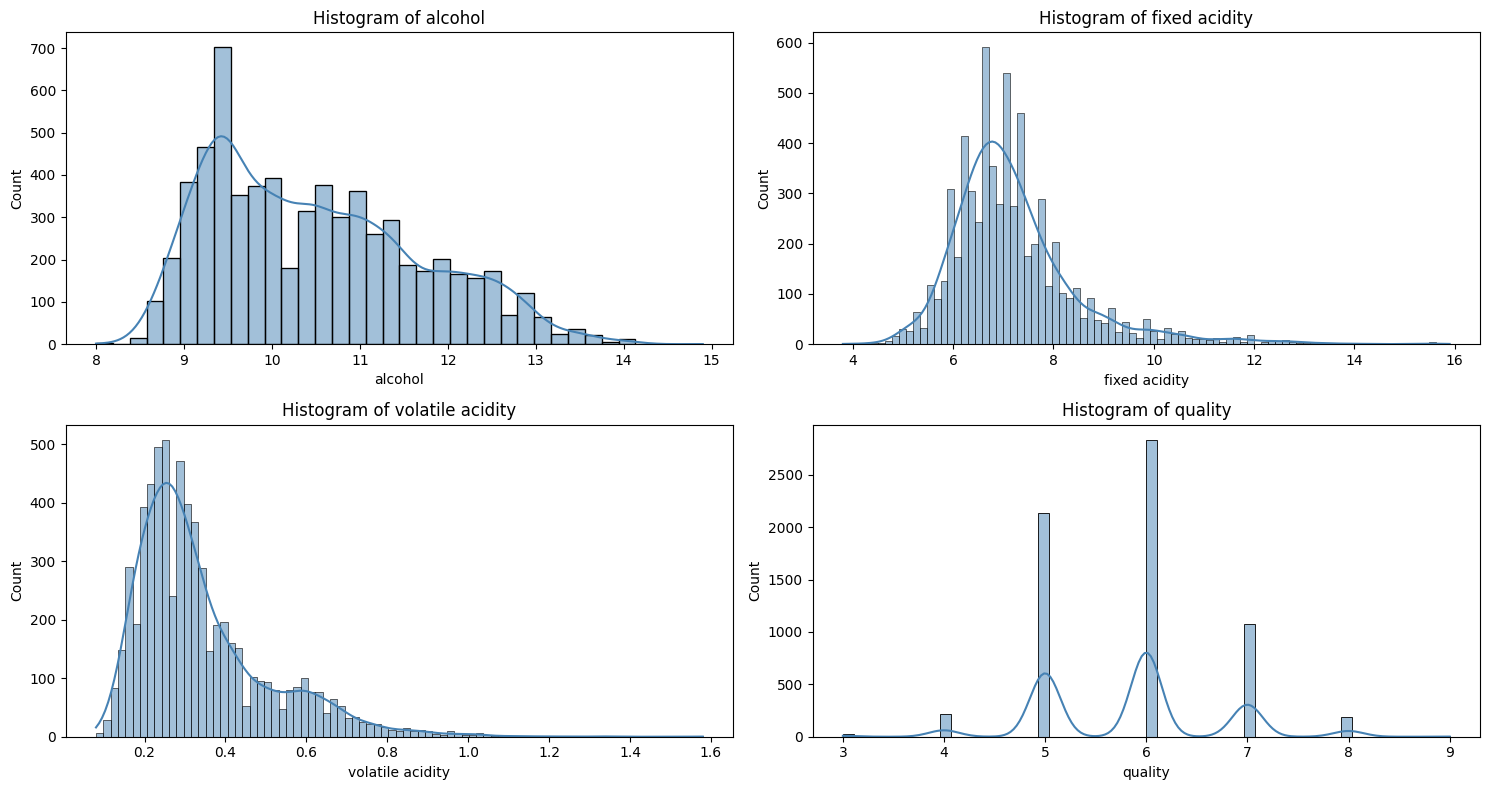

In [11]:

features_to_plot = ['alcohol', 'fixed acidity', 'volatile acidity', 'quality']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, color='steelblue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()



# BOXPLOT

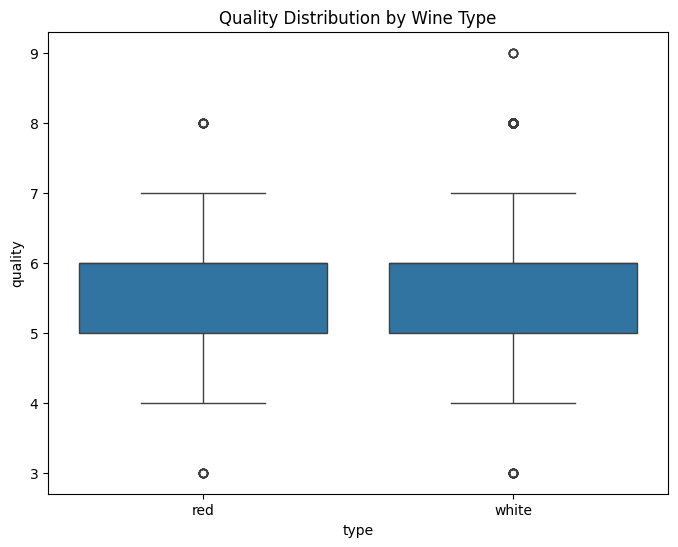

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='quality', data=df)
plt.title('Quality Distribution by Wine Type')
plt.show()

# COUNTPLOT

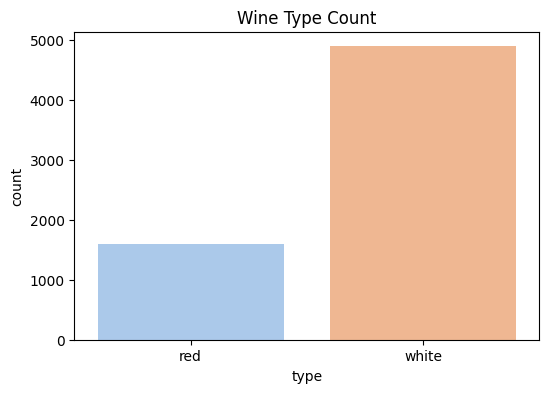

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Wine Type Count')
plt.show()

# PAIRPLOT

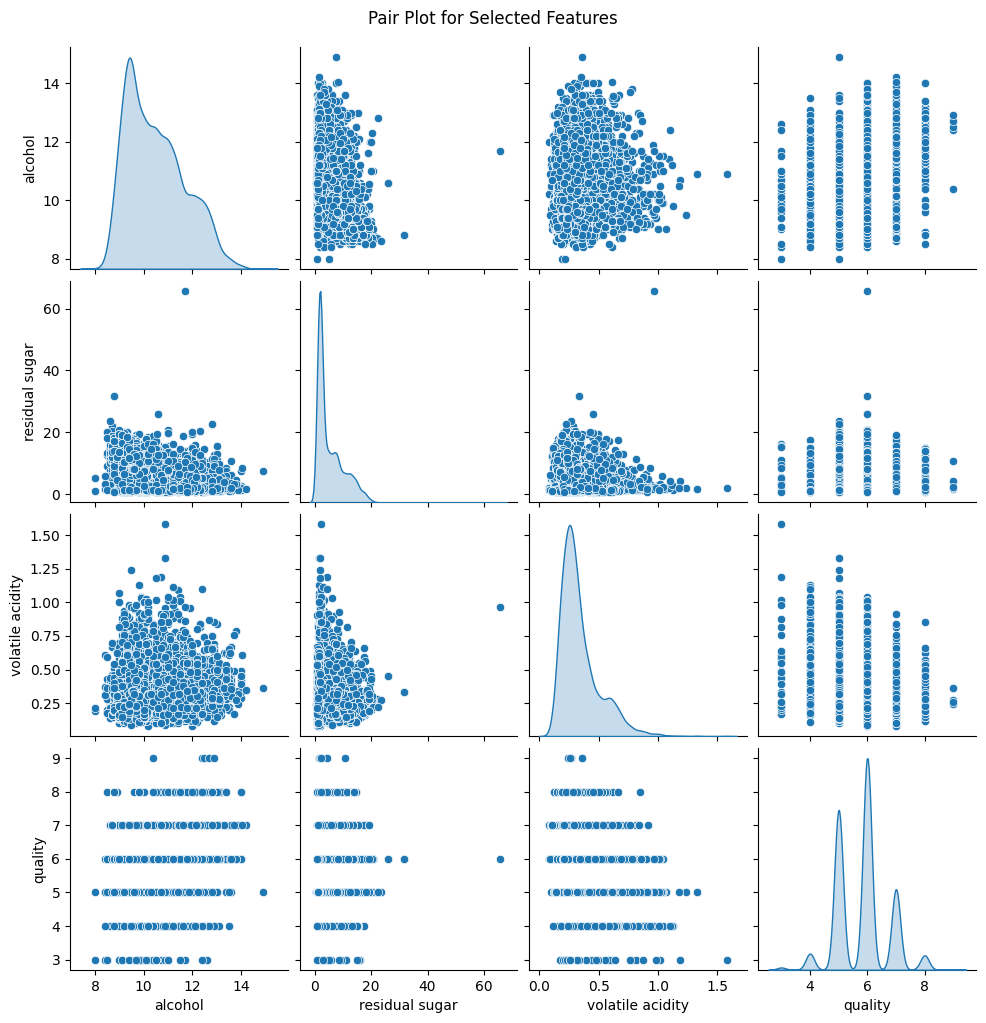

In [14]:
subset_features = ['alcohol', 'residual sugar', 'volatile acidity', 'quality']
sns.pairplot(df[subset_features], diag_kind='kde')
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()

# HEATMAP

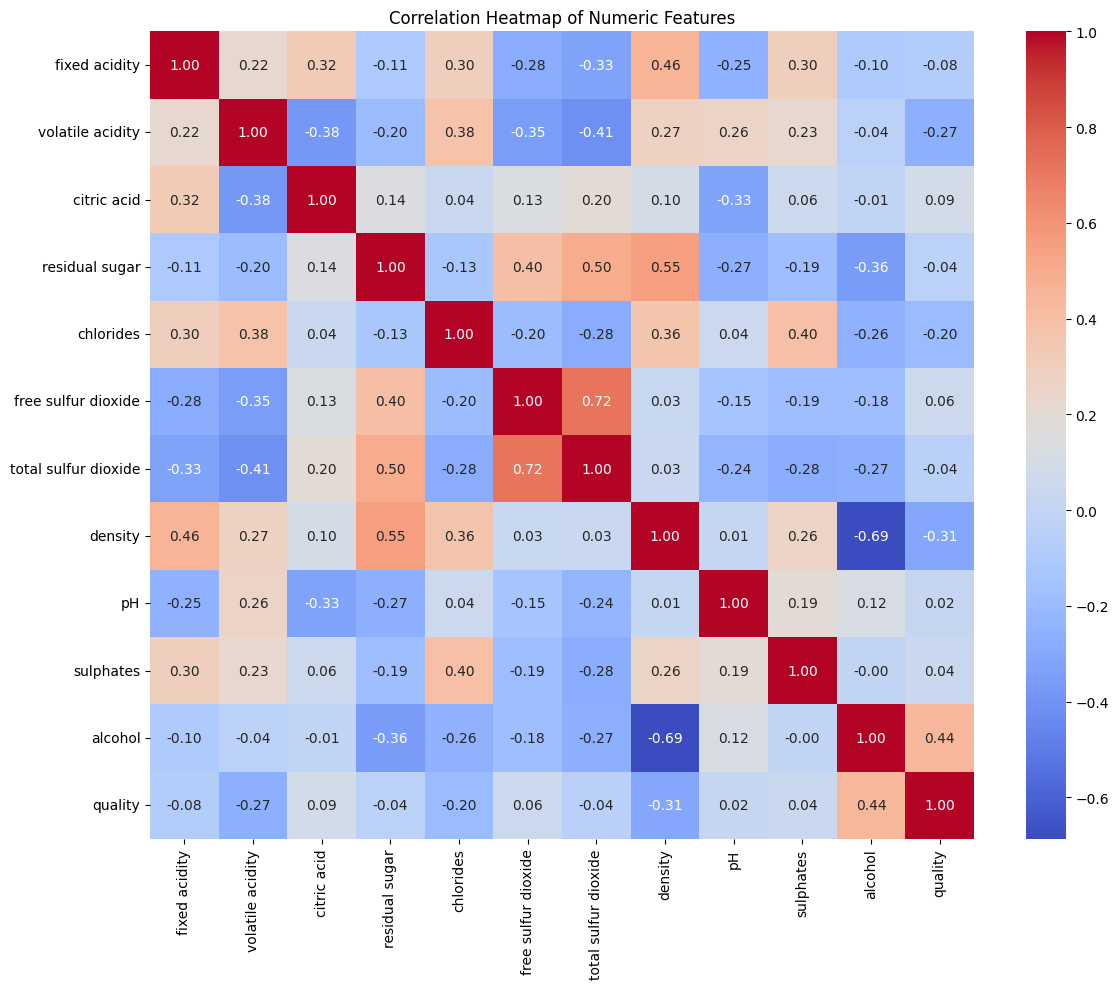

In [15]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])


In [17]:
df['good_quality'] = (df['quality'] > 6).astype(int)
features = df.drop(columns=[ 'type','quality','type_encoded'])
target = df['good_quality']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# DECISION TREE CLASSFIER

In [18]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predictions
y_pred = dtc.predict(X_test)

# SVM 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

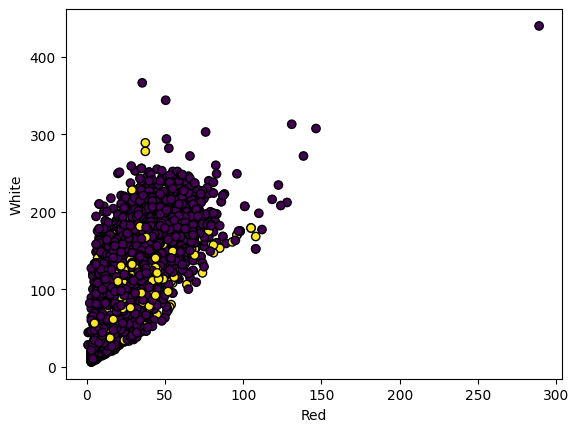

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

array = np.array(features)

plt.scatter(array[:,5], array[:,6], c=target, cmap='viridis', edgecolor='k')
plt.xlabel("Red")
plt.ylabel("White")
plt.show()

# LOGISTIC REGRESSION

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [22]:

classifier = LogisticRegression(max_iter=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)


Accuracy Score: 0.8054

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1048
           1       0.00      0.00      0.00       252

    accuracy                           0.81      1300
   macro avg       0.40      0.50      0.45      1300
weighted avg       0.65      0.81      0.72      1300



# Predictor Model

To explore whether the measured chemical properties can predict the quality of the wine, we will create a machine learning classifier. Because quality is rated on a scale and to simplify the modeling process, we transform the problem into a binary classification task.

For this purpose, we define a wine as "good quality" if the quality value exceeds 6.

The following steps are performed:

1. Feature and target extraction
2. Data splitting (train/test)
3. Model training using a Random Forest classifier
4. Evaluation of the predictor including accuracy, confusion matrix, and ROC curve

# ↪ accuracy score

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8054


# ↪ confusion matrix

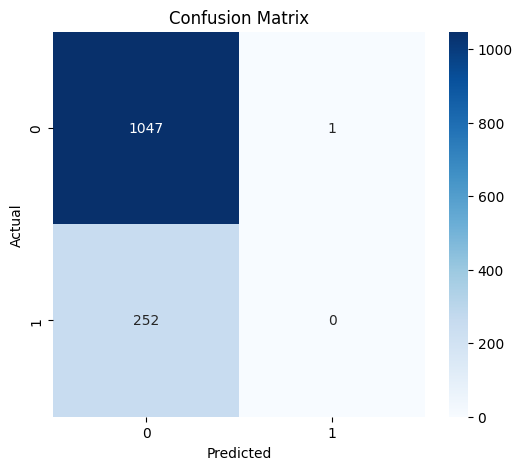

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ↪ ROC curve

In [26]:
# ROC Curve
y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

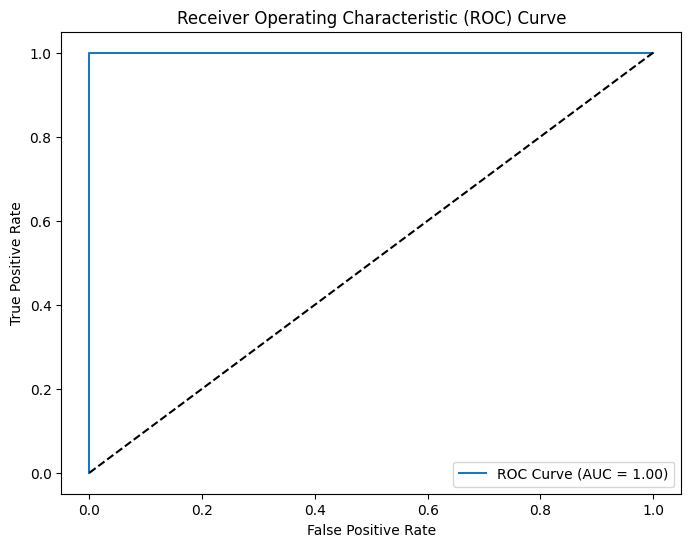

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 🧾 Conclusion 


**Merits of Approach:**

Good visualizations helped in understanding data clearly.
Strong classification methods reduced prediction errors.
The machine learning model worked well with accuracy, confusion matrix, and ROC curve results.The analysis of the wine_quality_merged dataset, which combines attributes of red and white wines, provides valuable insights into the chemical composition and quality of wines. The dataset contains multiple physicochemical variables (such as acidity, residual sugar, chlorides, sulphates, alcohol, and pH) along with a quality rating (0–10 scale) assigned by professional tasters.

**Key findings from the analysis include:**

* Alcohol Content and Quality
    Alcohol content shows a strong positive correlation with wine quality, making it a reliable indicator of better-rated wines.

* Acidity and Balance
    Wines with balanced acidity levels, especially fixed acidity and volatile acidity, tend to achieve higher quality scores, while excessive volatile acidity negatively affects ratings.

* Impact of Residual Sugar and Density
    Residual sugar and density have moderate to low influence on quality but are significant for differentiating between red and white wines.

* Sulphates and Sulphur Dioxide
    Sulphates contribute positively to wine preservation and slight quality improvement, while controlled use of free and total SO₂ ensures better stability without lowering quality perception.

* Quality Distribution
    Most wines in the dataset are rated average (scores 5–6), with fewer samples rated very high or very low, indicating that most commercial wines maintain a consistent, moderate standard.




🔹**Mean & Median values**



| Column           | Mean  | Median |
| ---------------- | ----- | ------ |
| fixed acidity    | 7.22  | 7.00   |
| volatile acidity | 0.34  | 0.29   |
| citric acid      | 0.32  | 0.31   |
| residual sugar   | 5.44  | 3.00   |
| alcohol          | 10.49 | 10.30  |
| quality          | 5.82  | 6.00   |


# 💡Future Work:
Improve model accuracy with parameter tuning.
Try advanced feature engineering.
Explore regression to predict the exact wine quality score (not just good/bad).
Separate analysis for red and white wines.
Study more deeply the differences between red and white wines.

Advantages and Disadvantages of Red and White Wine:

 # ↪🍷 Red Wine

**Advantages:**

Contains resveratrol and flavonoids (antioxidants) which may improve heart health.
May reduce risk of stroke and certain cancers (when taken in moderation).
Often has higher tannins and polyphenols, which can slow aging and improve cholesterol.


**Disadvantages:**

Stronger, heavier, and may cause headaches for sensitive people due to tannins.
Higher calorie and alcohol content than white wine.
Excessive consumption increases risk of liver disease and heart problems.


 # ↪🍾 White Wine

**Advantages:**

Lighter, refreshing, and often lower in alcohol compared to red wine.

May help with lung health due to certain antioxidants.

Pairs well with light foods (fish, chicken, salads).


**Disadvantages:**

Generally has less antioxidants than red wine.

Often contains more sugar than red wine, which may affect weight and blood sugar.

Can be acidic, sometimes irritating to teeth enamel and stomach.

# 👉 In short:

Red wine = more health benefits (antioxidants, heart health) but heavier and stronger.

White wine = lighter and easier to drink, but fewer health benefits compared to red.